# (1) Voting Ensemble (Hard Voting)

Loading data...
Training on 21394 samples, testing on 5349 samples.

Training Voting Ensemble...
Training complete.

Getting predictions...

--- Classification Report (Voting Ensemble) ---
                                                     precision    recall  f1-score   support

Credit reporting or other personal consumer reports       0.99      0.98      0.98      5003
                                    Debt collection       0.69      0.81      0.74       314
                                           Mortgage       0.85      0.88      0.86        32

                                           accuracy                           0.97      5349
                                          macro avg       0.84      0.89      0.86      5349
                                       weighted avg       0.97      0.97      0.97      5349


Plotting confusion matrix...
Confusion matrix for 'Voting Ensemble (Champion)' saved as confusion_matrix_voting_ensemble_champion.png

Script complete.


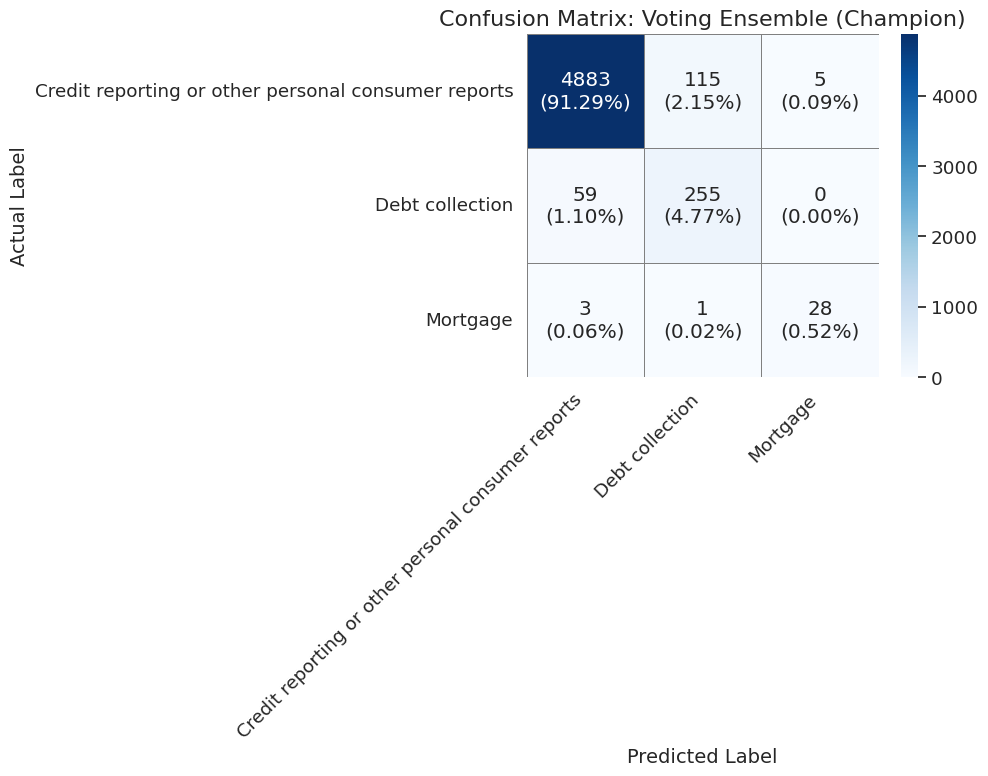

In [6]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

# --- Reusable Plotting Function ---
def plot_confusion_matrix(y_true, y_pred, class_labels, model_name=""):
    """
    Generates and plots a visually appealing confusion matrix with both
    raw counts and percentages.
    """
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    cm_percent = cm.astype('float') / cm.sum()
    counts = cm.flatten().astype(str)
    percents = [f"({p:.2%})" for p in cm_percent.flatten()]
    annot_labels = [f"{c}\n{p}" for c, p in zip(counts, percents)]
    annot_labels = np.asarray(annot_labels).reshape(cm.shape)

    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=annot_labels,
        fmt='s',
        cmap='Blues',
        xticklabels=class_labels,
        yticklabels=class_labels,
        linewidths=0.5,
        linecolor='gray'
    )
    plt.ylabel('Actual Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(f'Confusion Matrix: {model_name}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    safe_model_name = model_name.lower().replace(' ', '_').replace('(', '').replace(')', '')
    plt.savefig(f"confusion_matrix_{safe_model_name}.png", dpi=300)
    print(f"Confusion matrix for '{model_name}' saved as confusion_matrix_{safe_model_name}.png")

# --- Main Script ---

# 1. Load Data
print("Loading data...")
file_name = 'complaints-2025-11-01_06_26.csv'
df = pd.read_csv(file_name).dropna(subset=['Consumer complaint narrative', 'Product'])
X = df['Consumer complaint narrative']
y = df['Product']
class_labels = sorted(y.unique())

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training on {len(X_train)} samples, testing on {len(X_test)} samples.")

# 3. Define The Three "Voter" Pipelines
clf1 = SklearnPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)),
    ('clf', SGDClassifier(loss='hinge', random_state=42, class_weight='balanced', max_iter=1000, tol=1e-3, n_jobs=1))
])
clf2 = SklearnPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)),
    ('clf', PassiveAggressiveClassifier(random_state=42, class_weight='balanced', max_iter=1000, tol=1e-3, n_jobs=1))
])
clf3 = ImblearnPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)),
    ('smote', SMOTE(random_state=42)),
    ('clf', LinearSVC(random_state=42, max_iter=2000))
])

# 4. Train the Voting Ensemble
print("\nTraining Voting Ensemble...")
voting_clf = VotingClassifier(
    estimators=[('sgd', clf1), ('pa', clf2), ('svm_smote', clf3)],
    voting='hard',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)
print("Training complete.")

# 5. Get predictions
print("\nGetting predictions...")
y_pred_voting = voting_clf.predict(X_test)

# 6. Print Classification Report
print("\n--- Classification Report (Voting Ensemble) ---")
print(classification_report(y_test, y_pred_voting, labels=class_labels))

# 7. Call the plotting function
print("\nPlotting confusion matrix...")
plot_confusion_matrix(
    y_test,
    y_pred_voting,
    class_labels=class_labels,
    model_name="Voting Ensemble (Champion)"
)
print("\nScript complete.")

#(2) Passive Aggressive Classifier



Loading data...
Training on 21394 samples, testing on 5349 samples.

Training PassiveAggressiveClassifier (Balanced, TF-IDF)...
Training complete.

Getting predictions...

--- Classification Report (PassiveAggressive TF-IDF) ---
                                                     precision    recall  f1-score   support

Credit reporting or other personal consumer reports       0.99      0.98      0.98      5003
                                    Debt collection       0.72      0.79      0.75       314
                                           Mortgage       0.79      0.94      0.86        32

                                           accuracy                           0.97      5349
                                          macro avg       0.83      0.90      0.86      5349
                                       weighted avg       0.97      0.97      0.97      5349


Plotting confusion matrix...
Confusion matrix for 'PassiveAggressive (Balanced, TF-IDF)' saved as confusion_matrix_p

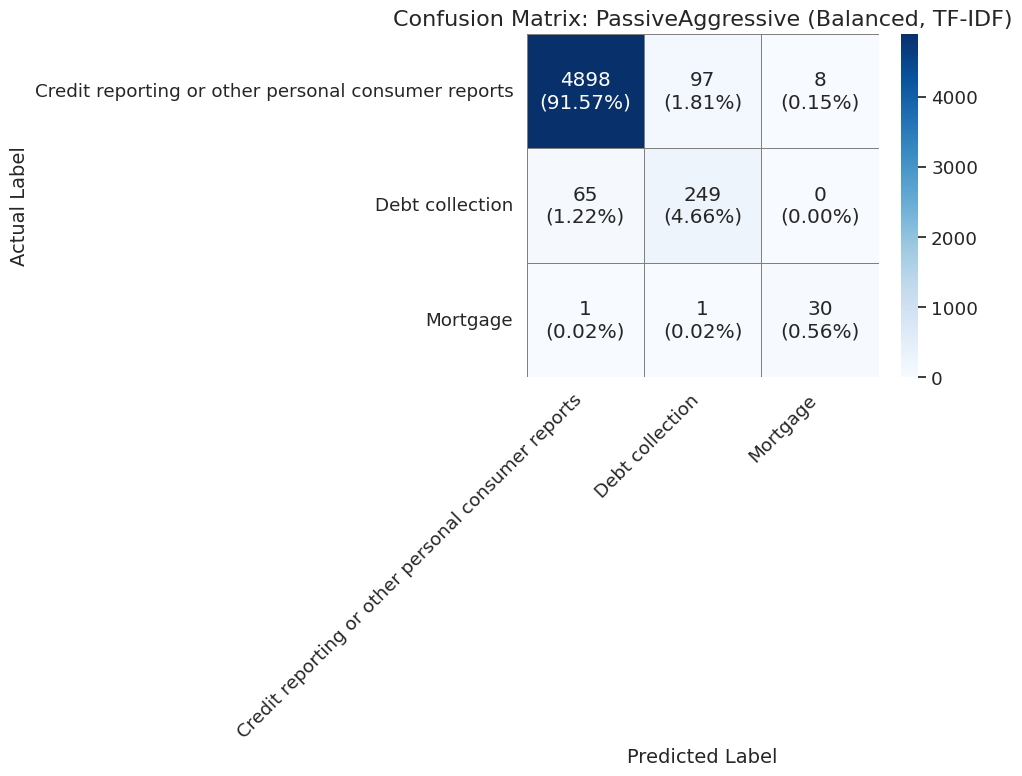

In [7]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# --- Reusable Plotting Function ---
def plot_confusion_matrix(y_true, y_pred, class_labels, model_name=""):
    """
    Generates and plots a visually appealing confusion matrix with both
    raw counts and percentages.
    """
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    cm_percent = cm.astype('float') / cm.sum()
    counts = cm.flatten().astype(str)
    percents = [f"({p:.2%})" for p in cm_percent.flatten()]
    annot_labels = [f"{c}\n{p}" for c, p in zip(counts, percents)]
    annot_labels = np.asarray(annot_labels).reshape(cm.shape)

    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=annot_labels,
        fmt='s',
        cmap='Blues',
        xticklabels=class_labels,
        yticklabels=class_labels,
        linewidths=0.5,
        linecolor='gray'
    )
    plt.ylabel('Actual Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(f'Confusion Matrix: {model_name}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    safe_model_name = model_name.lower().replace(' ', '_').replace('(', '').replace(')', '')
    plt.savefig(f"confusion_matrix_{safe_model_name}.png", dpi=300)
    print(f"Confusion matrix for '{model_name}' saved as confusion_matrix_{safe_model_name}.png")

# --- Main Script ---

# 1. Load Data
print("Loading data...")
file_name = 'complaints-2025-11-01_06_26.csv'
df = pd.read_csv(file_name).dropna(subset=['Consumer complaint narrative', 'Product'])
X = df['Consumer complaint narrative']
y = df['Product']
class_labels = sorted(y.unique())

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training on {len(X_train)} samples, testing on {len(X_test)} samples.")

# 3. Train the Model
print("\nTraining PassiveAggressiveClassifier (Balanced, TF-IDF)...")
pipeline_pa = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)),
    ('clf', PassiveAggressiveClassifier(
        random_state=42,
        class_weight='balanced',
        max_iter=1000,
        tol=1e-3,
        n_jobs=-1
    ))
])
pipeline_pa.fit(X_train, y_train)
print("Training complete.")

# 4. Get predictions
print("\nGetting predictions...")
y_pred_pa = pipeline_pa.predict(X_test)

# 5. Print Classification Report
print("\n--- Classification Report (PassiveAggressive TF-IDF) ---")
print(classification_report(y_test, y_pred_pa, labels=class_labels))

# 6. Call the plotting function
print("\nPlotting confusion matrix...")
plot_confusion_matrix(
    y_test,
    y_pred_pa,
    class_labels=class_labels,
    model_name="PassiveAggressive (Balanced, TF-IDF)"
)
print("\nScript complete.")

#(3) Stochastic Gradient Descent (SGD) Classifier

Loading data...
Training on 21394 samples, testing on 5349 samples.

Training SGDClassifier (Balanced, TF-IDF)...
Training complete.

Getting predictions...

--- Classification Report (SGDClassifier TF-IDF) ---
                                                     precision    recall  f1-score   support

Credit reporting or other personal consumer reports       0.99      0.98      0.98      5003
                                    Debt collection       0.70      0.81      0.75       314
                                           Mortgage       0.80      0.88      0.84        32

                                           accuracy                           0.97      5349
                                          macro avg       0.83      0.89      0.86      5349
                                       weighted avg       0.97      0.97      0.97      5349


Plotting confusion matrix...
Confusion matrix for 'SGDClassifier (Balanced, TF-IDF)' saved as confusion_matrix_sgdclassifier_balanced,

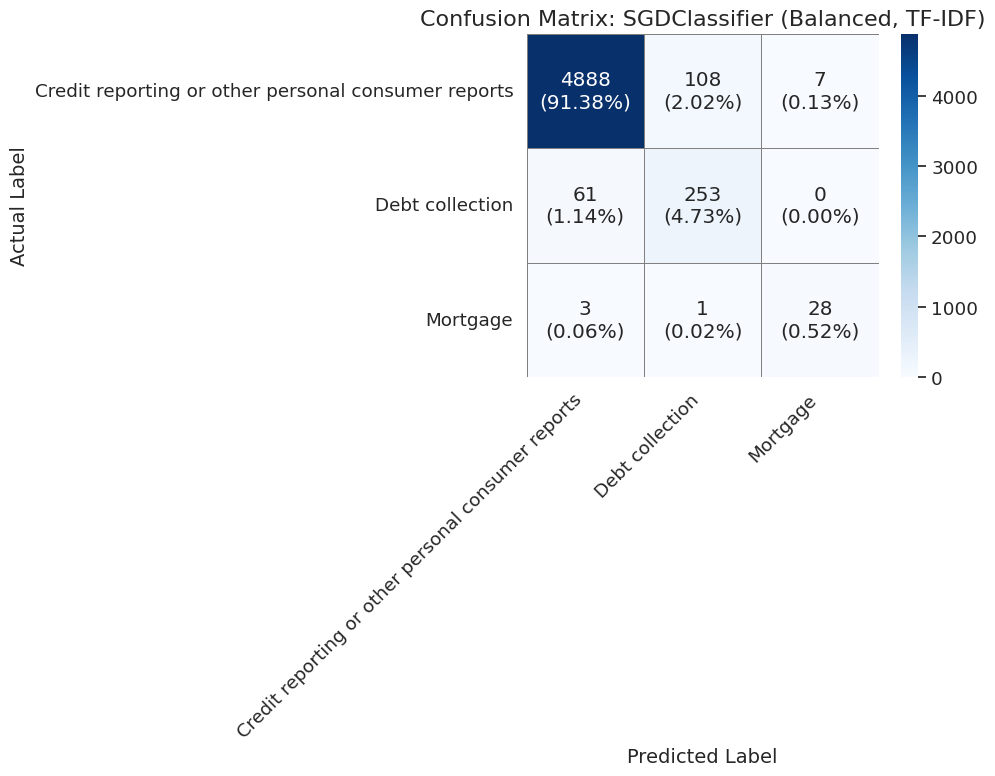

In [8]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# --- Reusable Plotting Function ---
def plot_confusion_matrix(y_true, y_pred, class_labels, model_name=""):
    """
    Generates and plots a visually appealing confusion matrix with both
    raw counts and percentages.
    """
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    cm_percent = cm.astype('float') / cm.sum()
    counts = cm.flatten().astype(str)
    percents = [f"({p:.2%})" for p in cm_percent.flatten()]
    annot_labels = [f"{c}\n{p}" for c, p in zip(counts, percents)]
    annot_labels = np.asarray(annot_labels).reshape(cm.shape)

    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=annot_labels,
        fmt='s',
        cmap='Blues',
        xticklabels=class_labels,
        yticklabels=class_labels,
        linewidths=0.5,
        linecolor='gray'
    )
    plt.ylabel('Actual Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(f'Confusion Matrix: {model_name}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    safe_model_name = model_name.lower().replace(' ', '_').replace('(', '').replace(')', '')
    plt.savefig(f"confusion_matrix_{safe_model_name}.png", dpi=300)
    print(f"Confusion matrix for '{model_name}' saved as confusion_matrix_{safe_model_name}.png")

# --- Main Script ---

# 1. Load Data
print("Loading data...")
file_name = 'complaints-2025-11-01_06_26.csv'
df = pd.read_csv(file_name).dropna(subset=['Consumer complaint narrative', 'Product'])
X = df['Consumer complaint narrative']
y = df['Product']
class_labels = sorted(y.unique())

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training on {len(X_train)} samples, testing on {len(X_test)} samples.")

# 3. Train the Model
print("\nTraining SGDClassifier (Balanced, TF-IDF)...")
pipeline_sgd = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)),
    ('clf', SGDClassifier(
        loss='hinge',
        random_state=42,
        class_weight='balanced',
        max_iter=1000,
        tol=1e-3,
        n_jobs=-1
    ))
])
pipeline_sgd.fit(X_train, y_train)
print("Training complete.")

# 4. Get predictions
print("\nGetting predictions...")
y_pred_sgd = pipeline_sgd.predict(X_test)

# 5. Print Classification Report
print("\n--- Classification Report (SGDClassifier TF-IDF) ---")
print(classification_report(y_test, y_pred_sgd, labels=class_labels))

# 6. Call the plotting function
print("\nPlotting confusion matrix...")
plot_confusion_matrix(
    y_test,
    y_pred_sgd,
    class_labels=class_labels,
    model_name="SGDClassifier (Balanced, TF-IDF)"
)
print("\nScript complete.")

# (4) Linear Support Vector Classification (LinearSVC) with SMOTE

Loading data...
Training on 21394 samples, testing on 5349 samples.

Training SVM + SMOTE...
Training complete.

Getting predictions...

--- Classification Report (SVM + SMOTE) ---
                                                     precision    recall  f1-score   support

Credit reporting or other personal consumer reports       0.99      0.97      0.98      5003
                                    Debt collection       0.64      0.82      0.72       314
                                           Mortgage       0.93      0.78      0.85        32

                                           accuracy                           0.96      5349
                                          macro avg       0.85      0.86      0.85      5349
                                       weighted avg       0.97      0.96      0.96      5349


Plotting confusion matrix...
Confusion matrix for 'SVM + SMOTE' saved as confusion_matrix_svm__smote.png

Script complete.


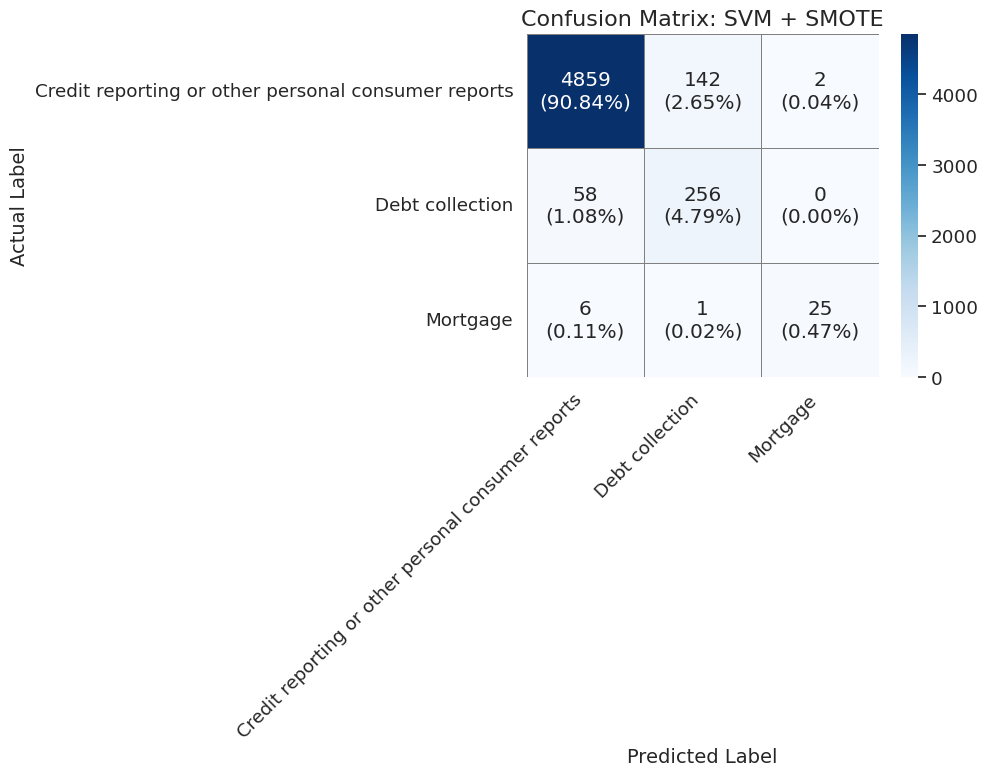

In [9]:
#4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

# --- Reusable Plotting Function ---
def plot_confusion_matrix(y_true, y_pred, class_labels, model_name=""):
    """
    Generates and plots a visually appealing confusion matrix with both
    raw counts and percentages.
    """
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    cm_percent = cm.astype('float') / cm.sum()
    counts = cm.flatten().astype(str)
    percents = [f"({p:.2%})" for p in cm_percent.flatten()]
    annot_labels = [f"{c}\n{p}" for c, p in zip(counts, percents)]
    annot_labels = np.asarray(annot_labels).reshape(cm.shape)

    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=annot_labels,
        fmt='s',
        cmap='Blues',
        xticklabels=class_labels,
        yticklabels=class_labels,
        linewidths=0.5,
        linecolor='gray'
    )
    plt.ylabel('Actual Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(f'Confusion Matrix: {model_name}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    safe_model_name = model_name.lower().replace(' ', '_').replace('+', '')
    plt.savefig(f"confusion_matrix_{safe_model_name}.png", dpi=300)
    print(f"Confusion matrix for '{model_name}' saved as confusion_matrix_{safe_model_name}.png")

# --- Main Script ---

# 1. Load Data
print("Loading data...")
file_name = 'complaints-2025-11-01_06_26.csv'
df = pd.read_csv(file_name).dropna(subset=['Consumer complaint narrative', 'Product'])
X = df['Consumer complaint narrative']
y = df['Product']
class_labels = sorted(y.unique())

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training on {len(X_train)} samples, testing on {len(X_test)} samples.")

# 3. Train the Model
print("\nTraining SVM + SMOTE...")
pipeline_smote_svm = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)),
    ('smote', SMOTE(random_state=42)),
    ('clf', LinearSVC(random_state=42, max_iter=2000))
])
pipeline_smote_svm.fit(X_train, y_train)
print("Training complete.")

# 4. Get predictions
print("\nGetting predictions...")
y_pred_smote_svm = pipeline_smote_svm.predict(X_test)

# 5. Print Classification Report
print("\n--- Classification Report (SVM + SMOTE) ---")
print(classification_report(y_test, y_pred_smote_svm, labels=class_labels))

# 6. Call the plotting function
print("\nPlotting confusion matrix...")
plot_confusion_matrix(
    y_test,
    y_pred_smote_svm,
    class_labels=class_labels,
    model_name="SVM + SMOTE"
)
print("\nScript complete.")

 # (5) Light Gradient Boosting Machine (LightGBM)

Loading data...
Training on 21394 samples, testing on 5349 samples.

Training LightGBM (Balanced, TF-IDF)...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.638442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174215
[LightGBM] [Info] Number of data points in the train set: 21394, number of used features: 2868
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training complete.

Getting predictions...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LightGBM) ---
                                                     precision    recall  f1-score   support

Credit reporting or other personal consumer reports       0.99      0.98      0.98      5003
                                    Debt collection       0.71      0.82      0.76       314
                                           Mortgage       0.88      0.69      0.77        32

                                           accuracy                           0.97      5349
                                          macro avg       0.86      0.83      0.84      5349
                                       weighted avg       0.97      0.97      0.97      5349


Plotting confusion matrix...
Confusion matrix for 'LightGBM (Balanced, TF-IDF)' saved as confusion_matrix_lightgbm_balanced,_tf-idf.png

Script complete.


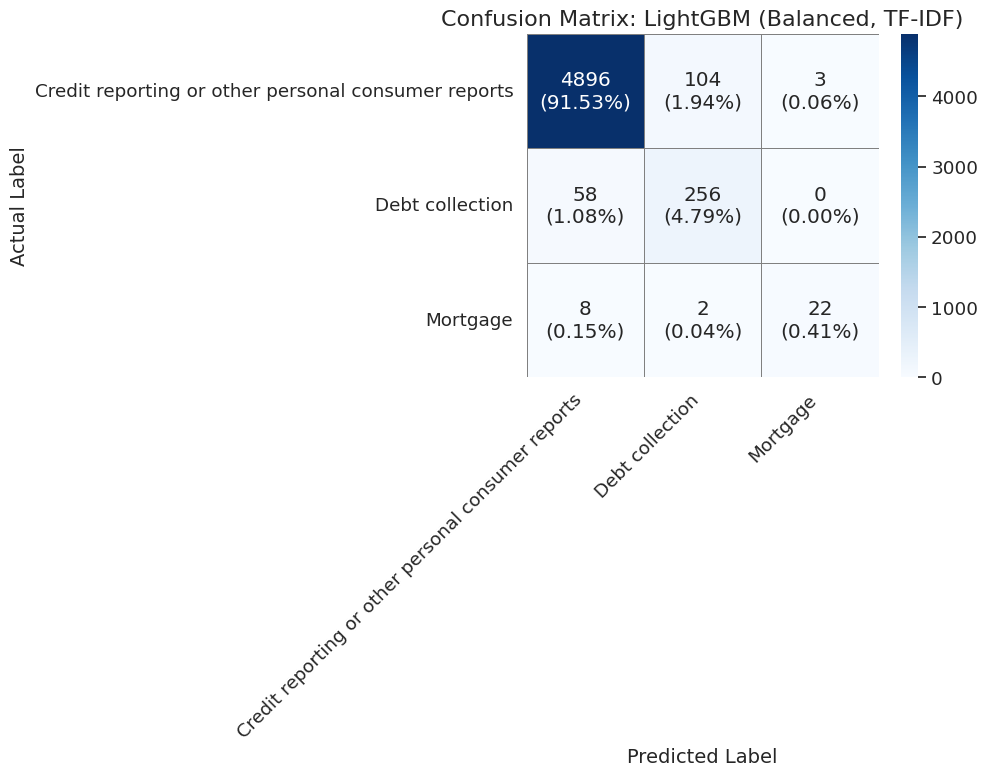

In [10]:
#5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgbm # Requires 'pip install lightgbm'
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# --- Reusable Plotting Function ---
def plot_confusion_matrix(y_true, y_pred, class_labels, model_name=""):
    """
    Generates and plots a visually appealing confusion matrix with both
    raw counts and percentages.
    """
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    cm_percent = cm.astype('float') / cm.sum()
    counts = cm.flatten().astype(str)
    percents = [f"({p:.2%})" for p in cm_percent.flatten()]
    annot_labels = [f"{c}\n{p}" for c, p in zip(counts, percents)]
    annot_labels = np.asarray(annot_labels).reshape(cm.shape)

    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=annot_labels,
        fmt='s',
        cmap='Blues',
        xticklabels=class_labels,
        yticklabels=class_labels,
        linewidths=0.5,
        linecolor='gray'
    )
    plt.ylabel('Actual Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(f'Confusion Matrix: {model_name}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    safe_model_name = model_name.lower().replace(' ', '_').replace('(', '').replace(')', '')
    plt.savefig(f"confusion_matrix_{safe_model_name}.png", dpi=300)
    print(f"Confusion matrix for '{model_name}' saved as confusion_matrix_{safe_model_name}.png")

# --- Main Script ---

# 1. Load Data
print("Loading data...")
file_name = 'complaints-2025-11-01_06_26.csv'
df = pd.read_csv(file_name).dropna(subset=['Consumer complaint narrative', 'Product'])
X = df['Consumer complaint narrative']
y = df['Product']
class_labels = sorted(y.unique())

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training on {len(X_train)} samples, testing on {len(X_test)} samples.")

# 3. Train the Model
print("\nTraining LightGBM (Balanced, TF-IDF)...")
pipeline_lgbm = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)),
    ('clf', lgbm.LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])
pipeline_lgbm.fit(X_train, y_train)
print("Training complete.")

# 4. Get predictions
print("\nGetting predictions...")
y_pred_lgbm = pipeline_lgbm.predict(X_test)

# 5. Print Classification Report
print("\n--- Classification Report (LightGBM) ---")
print(classification_report(y_test, y_pred_lgbm, labels=class_labels))

# 6. Call the plotting function
print("\nPlotting confusion matrix...")
plot_confusion_matrix(
    y_test,
    y_pred_lgbm,
    class_labels=class_labels,
    model_name="LightGBM (Balanced, TF-IDF)"
)
print("\nScript complete.")